## Exploración de datos: accesos de internet por tecnología

#### Índice
1. [Descripción de los datos ](#id1)
2. [Outliers](#id2)
4. [Visualización de los datos](#id3)
5. [Conclusión](#id4)
6. [Fuentes adicionales](#id5)

### Descripción de los datos<a name="id1"></a>
Se describen la cantidad de registros, y columnas con sus tipos de datos, ocupación en memoria y una estaditica descriptiva de los mismos: cual es el promedio, desvío estandar, cuartiles, medidas de tendencia central.

In [2]:
# importamos las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt 

In [3]:
df = pd.read_csv('../datasets/Internet_Accesos-por-tecnologia.csv', delimiter=';')

In [4]:
df.head()

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,3,1395277,6031970,2871541,557110,235230,11091128,Jul-Sept 2022
1,2022,2,1468333,5979214,2723285,556243,231609,10958684,Abr-Jun 2022
2,2022,1,1533240,6073426,2219533,545814,251996,10624009,Ene-Mar 2022
3,2021,4,1657615,5984240,2072236,523107,252596,10489794,Oct-Dic 2021
4,2021,3,1950631,5826257,1566048,492415,250190,10085541,Jul-Sept 2021


In [5]:
# se averigua cuantos registros hay: 35 registros
df.shape[0]

35

In [6]:
# Se observa por columna: la cantidad de registro, el tipo de dato y si tiene valores nulos o no. 
# Tambien se observa el uso de memoria.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Año           35 non-null     int64 
 1   Trimestre     35 non-null     int64 
 2   ADSL          35 non-null     int64 
 3   Cablemodem    35 non-null     int64 
 4   Fibra óptica  35 non-null     int64 
 5   Wireless      35 non-null     int64 
 6   Otros         35 non-null     int64 
 7   Total         35 non-null     int64 
 8   Periodo       35 non-null     object
dtypes: int64(8), object(1)
memory usage: 2.6+ KB


In [7]:
# Se pasan algunas variables a categoricas
df['Año']           = df['Año'].astype('category')
df['Trimestre']     = df['Trimestre'].astype('category')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   Año           35 non-null     category
 1   Trimestre     35 non-null     category
 2   ADSL          35 non-null     int64   
 3   Cablemodem    35 non-null     int64   
 4   Fibra óptica  35 non-null     int64   
 5   Wireless      35 non-null     int64   
 6   Otros         35 non-null     int64   
 7   Total         35 non-null     int64   
 8   Periodo       35 non-null     object  
dtypes: category(2), int64(6), object(1)
memory usage: 2.7+ KB


In [9]:
df['Año'].unique() # Vemos los distintos valores para la categoria trimestre

[2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014]
Categories (9, int64): [2014, 2015, 2016, 2017, ..., 2019, 2020, 2021, 2022]

In [10]:
df.describe()
# Se puede observar que no hay valores nulos o en cero asimismo tambien antes visualizamos que no hay valores nulos.

,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
count,3.500000e+01,3.500000e+01,3.500000e+01,35.000000,35.000000,3.500000e+01
mean,3.040425e+06,4.122601e+06,7.390627e+05,248280.028571,147431.085714,8.297800e+06
std,8.354122e+05,1.225277e+06,7.861772e+05,174354.292929,85868.716764,1.399611e+06
min,1.395277e+06,2.407330e+06,1.391870e+05,70749.000000,54300.000000,6.398398e+06
25%,2.279711e+06,2.966749e+06,1.679880e+05,85107.500000,62763.500000,7.057455e+06
50%,3.557216e+06,4.038141e+06,2.262850e+05,194267.000000,100554.000000,8.110444e+06
75%,3.723156e+06,5.132233e+06,1.138802e+06,394963.000000,247918.500000,9.260442e+06
max,3.803024e+06,6.073426e+06,2.871541e+06,557110.000000,265328.000000,1.109113e+07


### Outliers<a name="id2"></a>
Detección de valores atípicos.

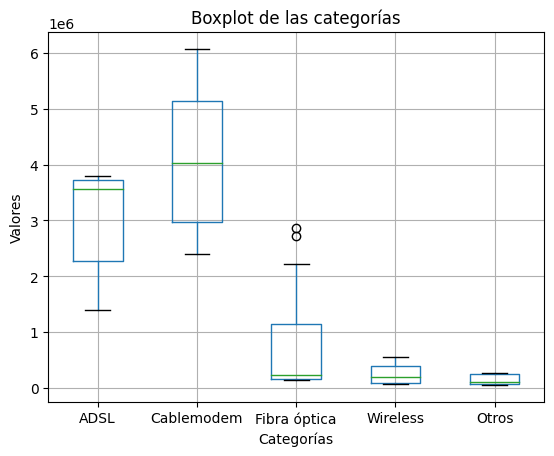

In [17]:
# Se averigua datos outliers, se crea boxplot para las columnas de interés
columnas = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']

df[columnas].boxplot()

plt.xlabel('Categorías')
plt.ylabel('Valores')
plt.title('Boxplot de las categorías')

plt.show()

Con el grafico de cajas, se puede observar valores atipicos en el servicio por fibra optica.
Se indaga cuales son esos registros.

# Metodo de la Regla de las Tres Sigmas
mínimo = Promedio – 3 * Desviación Estándar
máximo = Promedio + 3 * Desviación Estándar

In [12]:
minimo = df['Fibra óptica'].mean() - 3 * df['Fibra óptica'].std()
print(minimo)

-1619468.8076723148


In [14]:
maximo = df['Fibra óptica'].mean() + 3 * df['Fibra óptica'].std()
print(maximo)

3097594.2933866004


In [15]:
atípicos = df[df['Fibra óptica'] > maximo]

print(atípicos)


Empty DataFrame
Columns: [Año, Trimestre, ADSL, Cablemodem, Fibra óptica, Wireless, Otros, Total, Periodo]
Index: []


En principio no se recupera los datos anomalos con el metodo de tres sigma. 
Pero ahora se ve con el método de método de rango intercuartílico o IQR (método de Tukey's fences)

In [18]:

# Calcular los límites para los outliers
Q1 = df['Fibra óptica'].quantile(0.25)
Q3 = df['Fibra óptica'].quantile(0.75)
IQR = Q3 - Q1
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar los registros que contienen outliers en la columna 'Fibra óptica'
outliers = df.loc[(df['Fibra óptica'] < limite_inferior) | (df['Fibra óptica'] > limite_superior)]

print(outliers)

    Año Trimestre     ADSL  Cablemodem  Fibra óptica  Wireless   Otros  \
0  2022         3  1395277     6031970       2871541    557110  235230   
1  2022         2  1468333     5979214       2723285    556243  231609   

      Total        Periodo  
0  11091128  Jul-Sept 2022  
1  10958684   Abr-Jun 2022  


Como dedución a los distintos resultados de los metodos de detección de autliers se debe a que el método de tres sigmas se basa en la desviación estándar de los datos y asume que los datos siguen una distribución normal. 
Asi que lo que sigue es ver la distribución de estas variables categóricas.
Haber hallado estos datos atipicos con el metodo de de Tukey's fences, no significan error en estos registros, simplemente que estos valores estan más alejados del conunto de datos

### Visualización de los datos <a name="id3"></a>

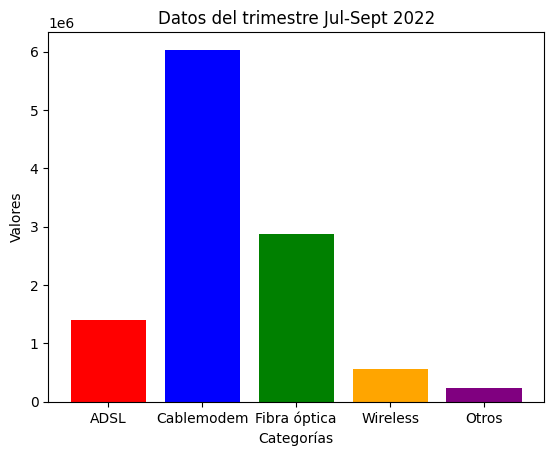

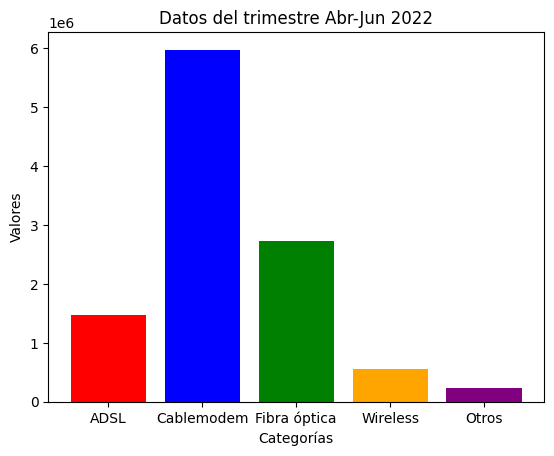

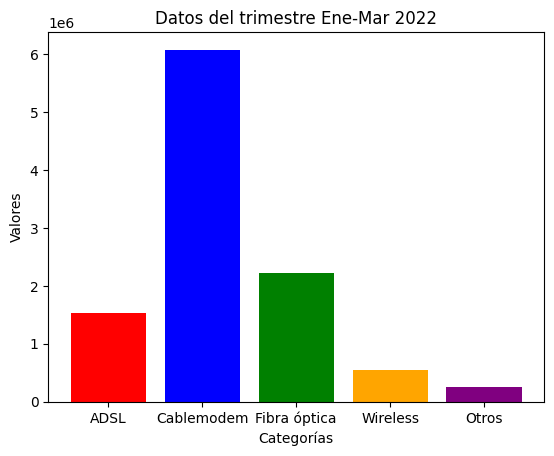

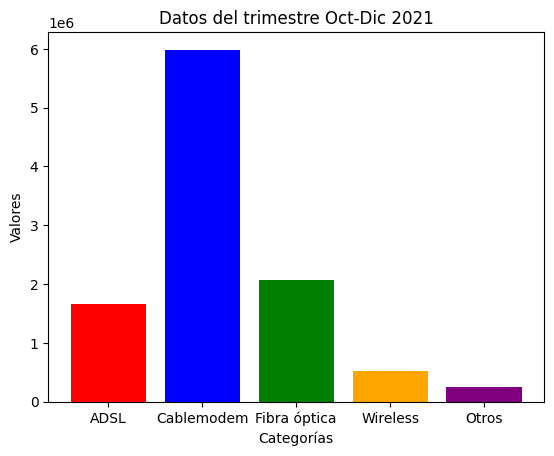

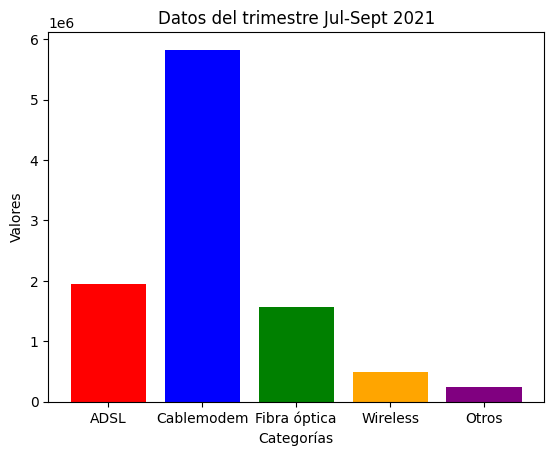

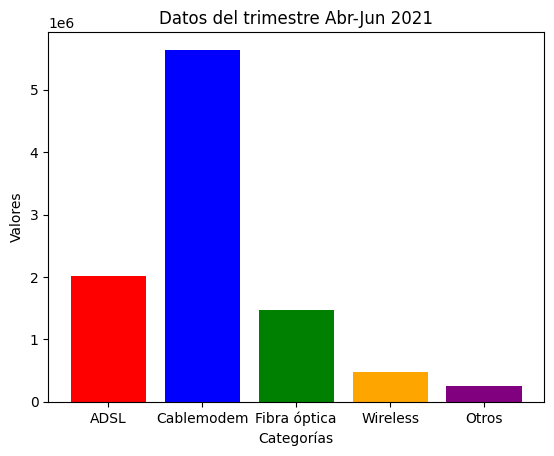

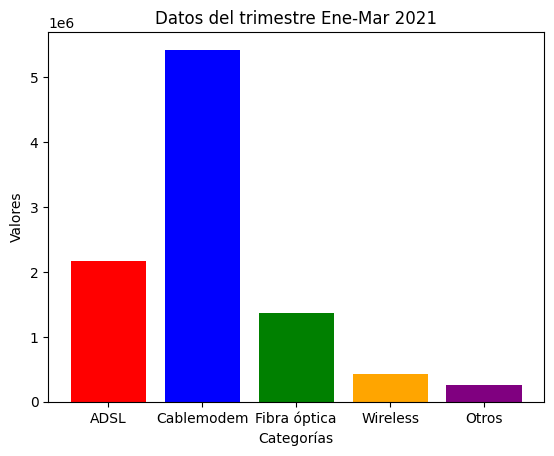

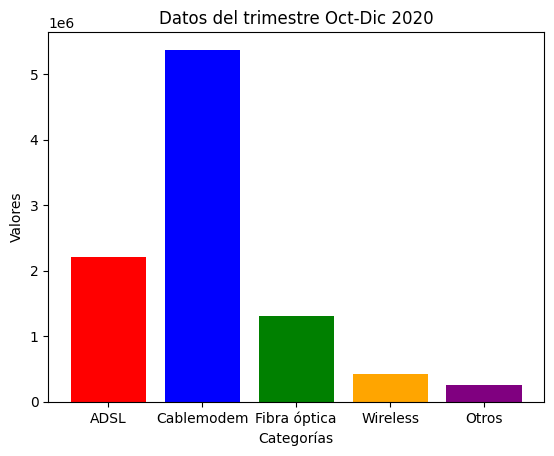

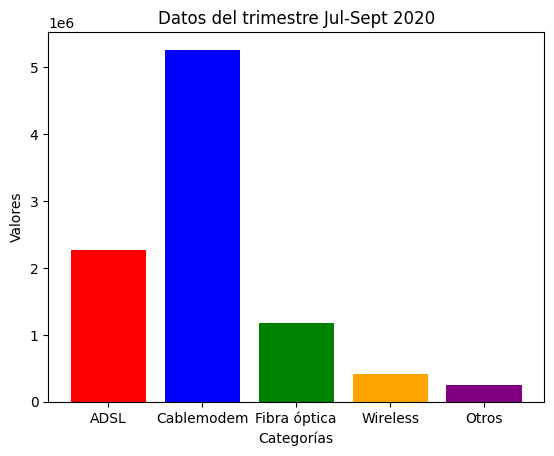

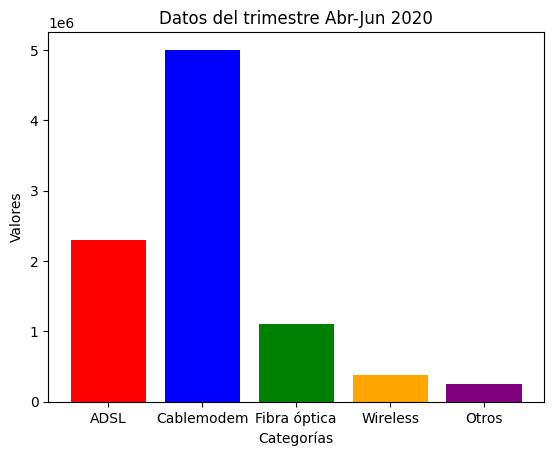

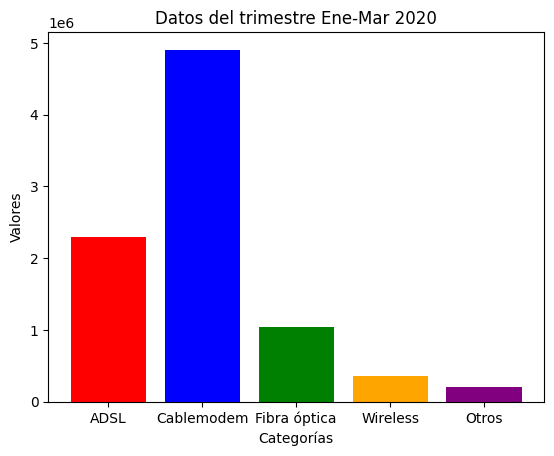

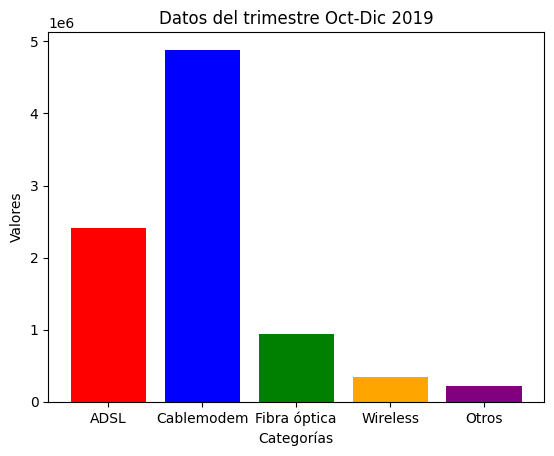

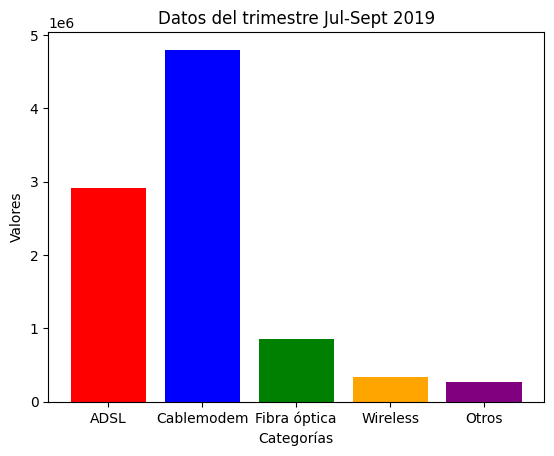

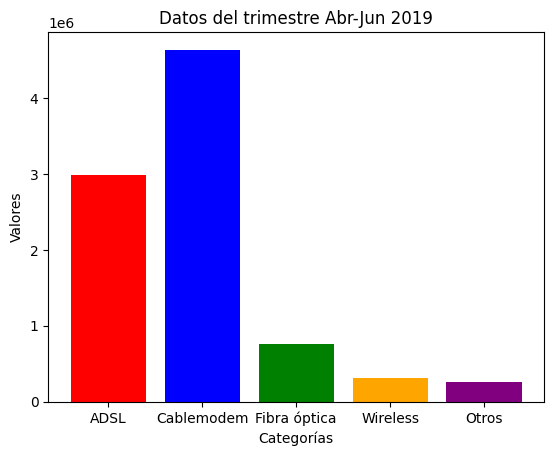

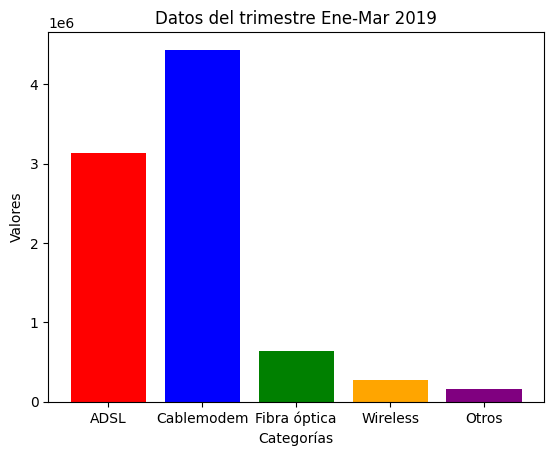

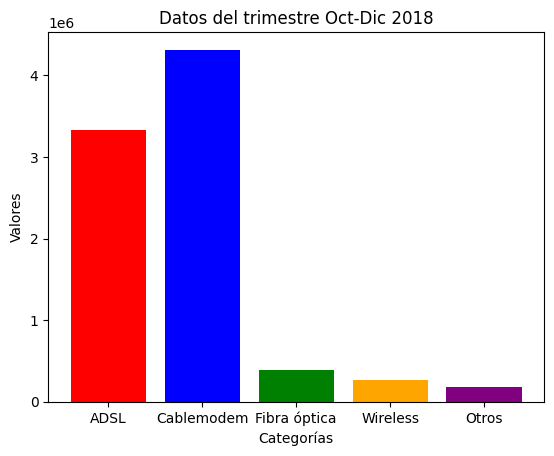

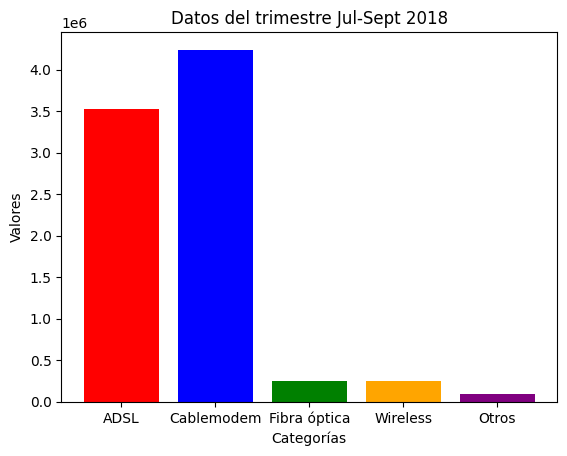

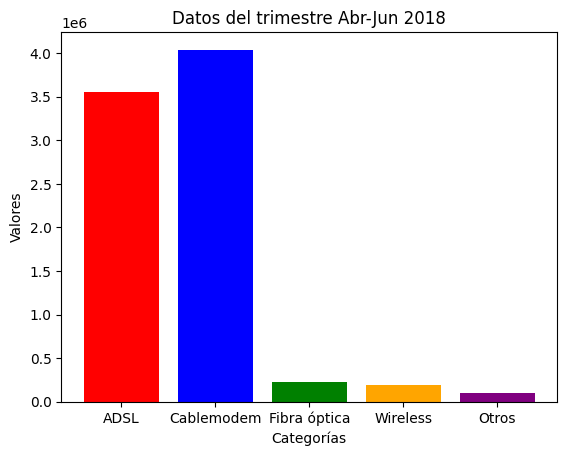

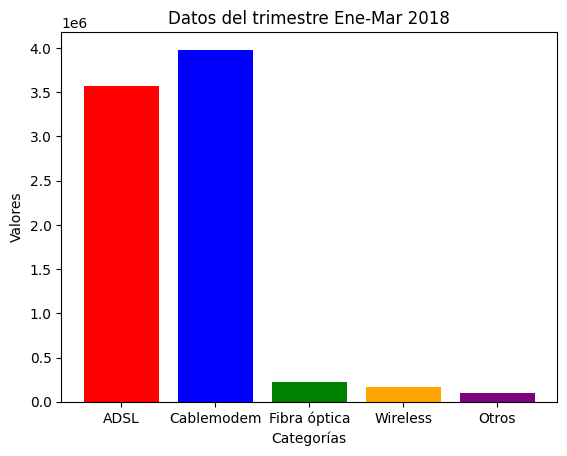

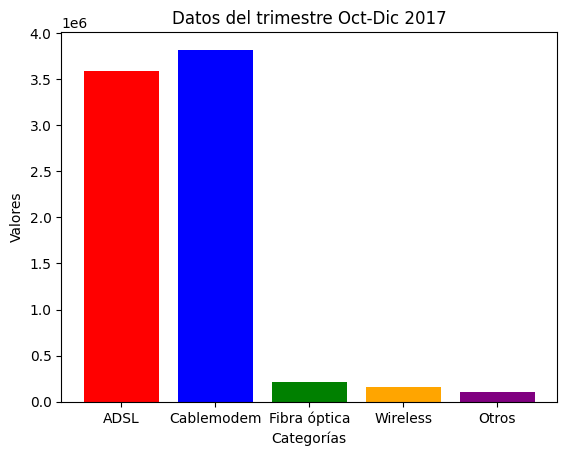

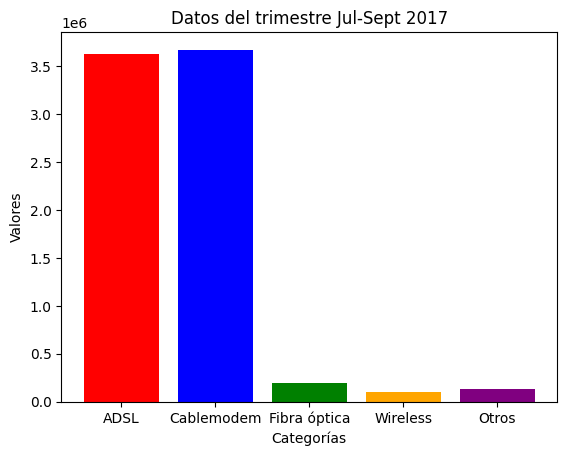

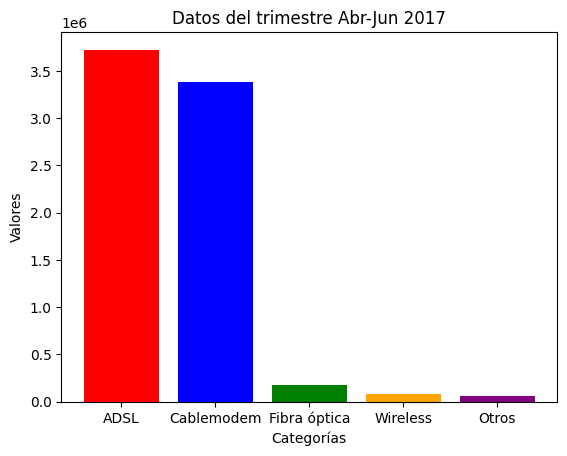

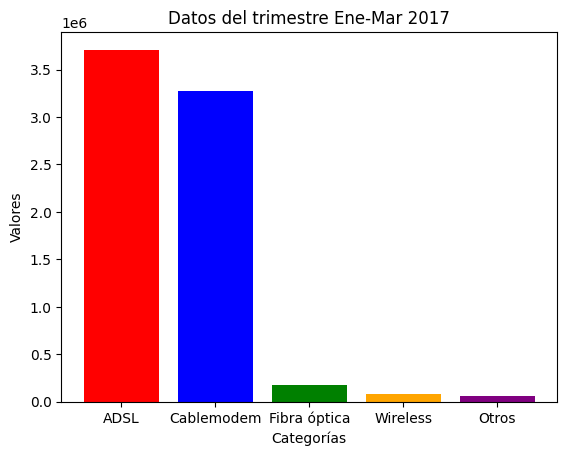

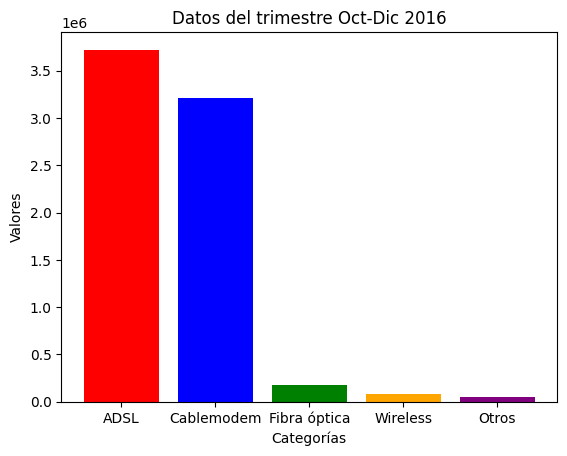

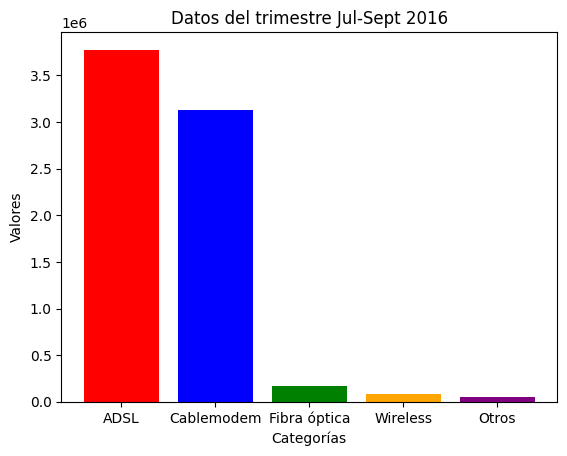

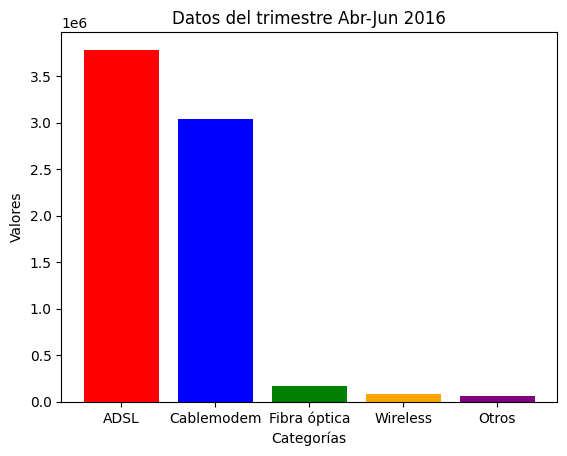

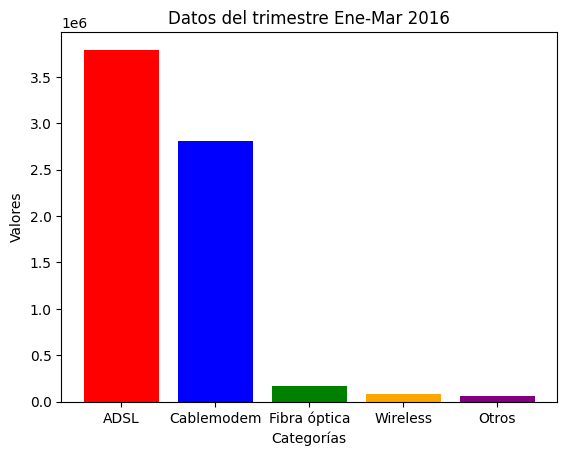

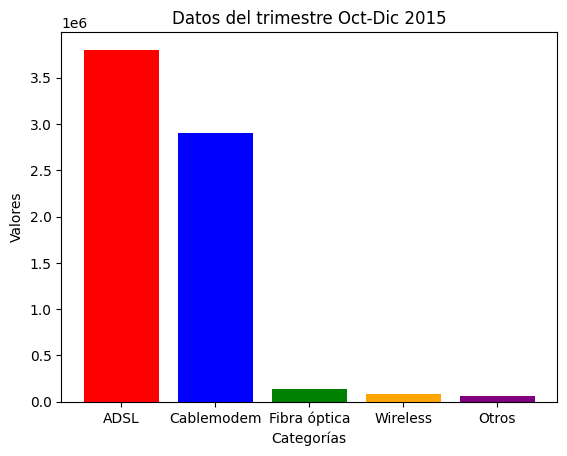

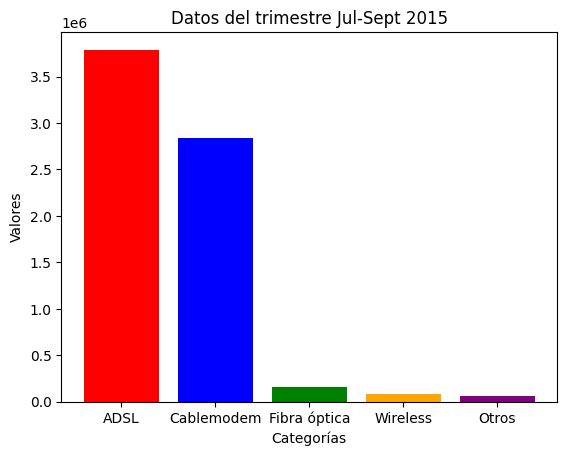

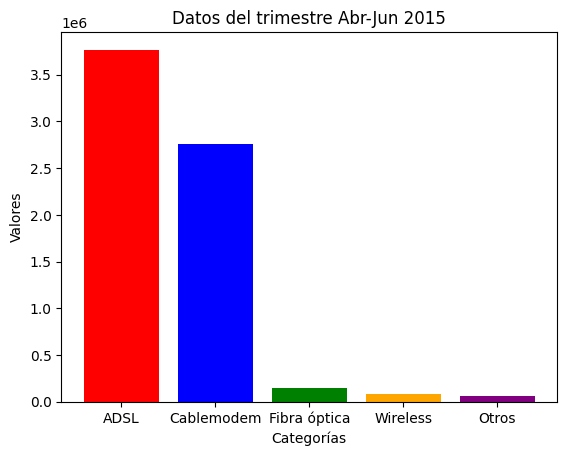

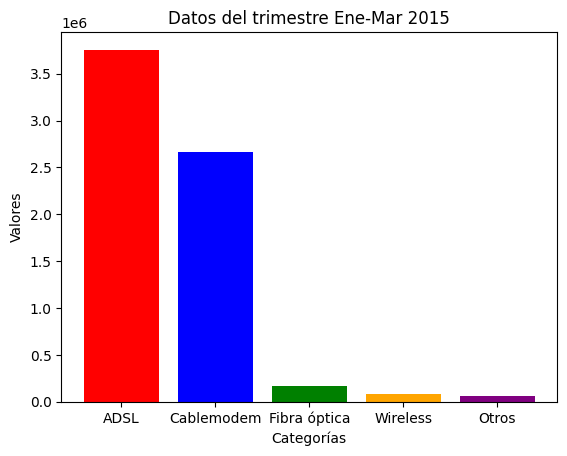

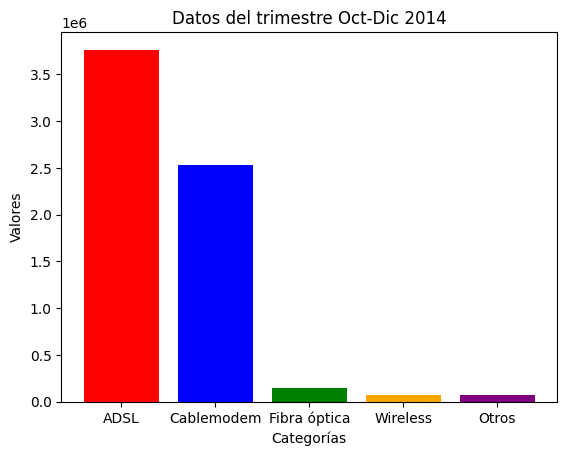

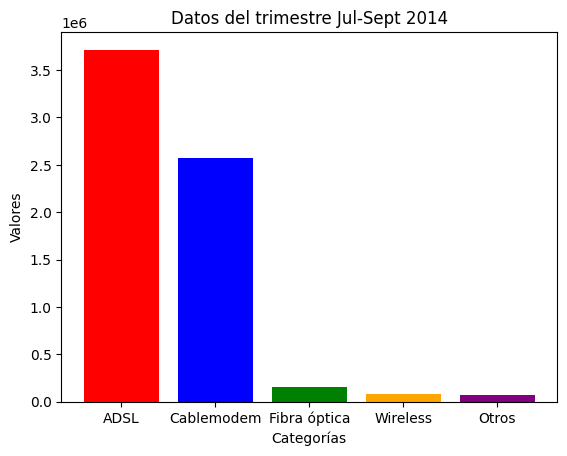

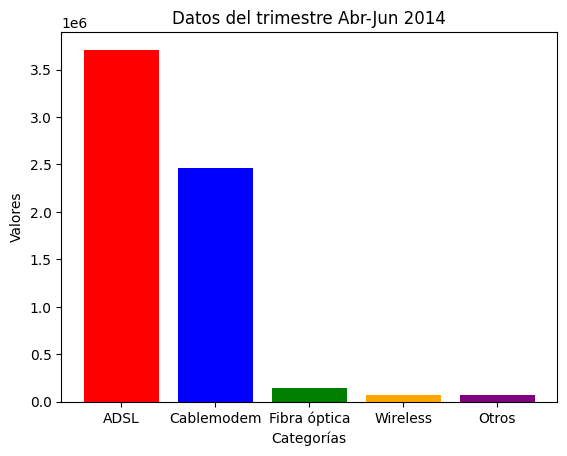

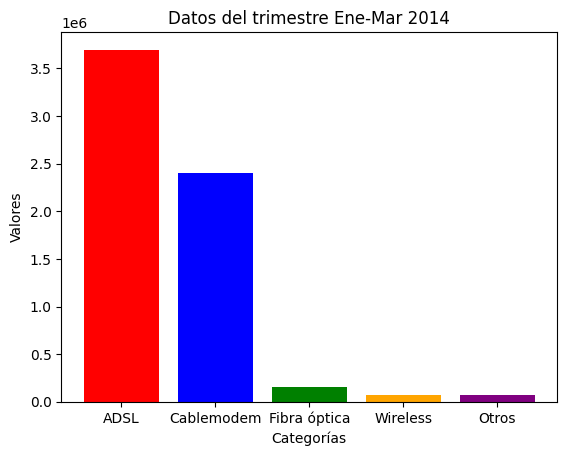

In [17]:
# Se crea un gráfico de barras para los datos de cada trimestre, 
# ordenados de los mas recientes a los más antiguos
df = df.sort_values('Año', ascending=False)

trimestres = df['Periodo']
columnas    = ['ADSL', 'Cablemodem', 'Fibra óptica', 'Wireless', 'Otros']
colores     = ['red', 'blue', 'green', 'orange', 'purple']

for trimestre in trimestres:
    datos_trimestre     = (df[df['Periodo'] == trimestre] )
      
    datos               = datos_trimestre[columnas].values.tolist()[0] 
    
    plt.bar(columnas, datos, color=colores)
    plt.xlabel('Categorías')
    plt.ylabel('Valores')
    plt.title(f'Datos del trimestre {trimestre}')
    plt.show()

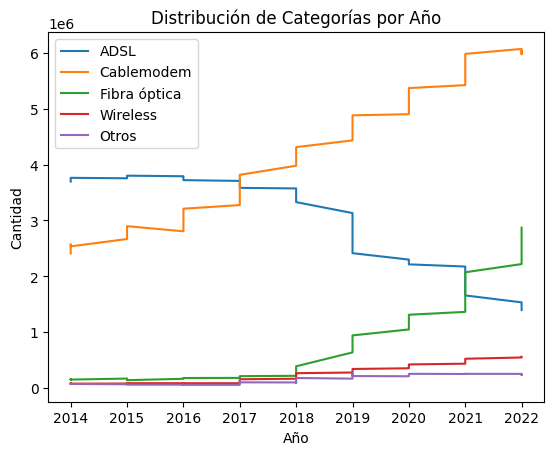

In [44]:
# Crear el gráfico de líneas
plt.plot(df['Año'], df['ADSL'], label='ADSL')
plt.plot(df['Año'], df['Cablemodem'], label='Cablemodem')
plt.plot(df['Año'], df['Fibra óptica'], label='Fibra óptica')
plt.plot(df['Año'], df['Wireless'], label='Wireless')
plt.plot(df['Año'], df['Otros'], label='Otros')

# Personalizar el gráfico
plt.xlabel('Año')
plt.ylabel('Cantidad')
plt.title('Distribución de Categorías por Año')
plt.legend()

# Mostrar el gráfico
plt.show()

### Conclusión <a name="id4"></a>
Según lo observado en los gráficos de barra se concluye que el servicio de internet más contratado es en la modalidad de cable modem y la minoría se representa por la categoría otros. Según la fuente del Enacom[^1]  en esa categoría pueden incluirse los contratados por acceso telefónico (Dial-Up), acceso por red de telefonía móvil y acceso por linea eléctrica.
También se observa que a lo largo de los años, hubo un mayor crecimiento en la demanda de tecnologia de acceso de internet por cable modem y fibra óptica, no asi, en el caso de ADSL, que fue decreciendo.

### Fuentes adicionales <a name="id5"></a>
Se consultaron las siguientes fuentes adicionales al analisis exploratorio de datos.

[^1]: Tipos de acceso a internet https://www.enacom.gob.ar/tipos-de-conexion_p112